In [ ]:
import tensorflow as tf
from tensorflow.keras import layers , models , datasets

In [ ]:
(X_train , y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()
X_train , X_test = X_train/255 , X_test/255

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
class_names =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

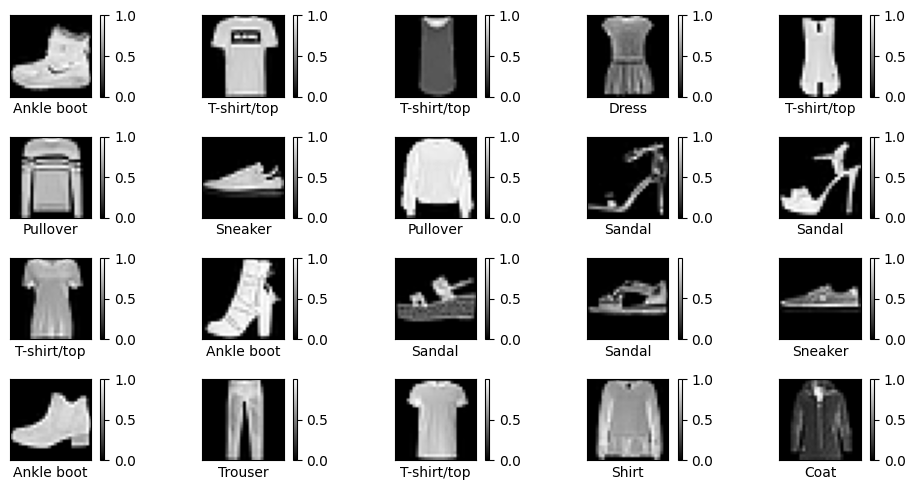

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
for i in range(20):
  plt.subplot(4,5 , i+1)
  plt.imshow(X_train[i] , cmap = 'gray')
  plt.xlabel(class_names[y_train[i]])
  plt.xticks([])
  plt.yticks([])
  plt.colorbar()
plt.tight_layout()
plt.show()

In [ ]:
#Model
model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = (28,28,1)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [ ]:
model.compile(optimizer='adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy() , metrics = ['accuracy'])

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_split=0.2)

Epoch 1/75
12/12 [==============================] - 7s 140ms/step - loss: 1.8450 - accuracy: 0.3957 - val_loss: 1.2732 - val_accuracy: 0.5904
Epoch 2/75
12/12 [==============================] - 1s 64ms/step - loss: 0.9994 - accuracy: 0.6772 - val_loss: 0.7406 - val_accuracy: 0.7542
Epoch 3/75
12/12 [==============================] - 1s 58ms/step - loss: 0.6813 - accuracy: 0.7668 - val_loss: 0.5965 - val_accuracy: 0.7873
Epoch 4/75
12/12 [==============================] - 1s 50ms/step - loss: 0.5744 - accuracy: 0.8015 - val_loss: 0.5318 - val_accuracy: 0.8108
Epoch 5/75
12/12 [==============================] - 1s 48ms/step - loss: 0.5154 - accuracy: 0.8220 - val_loss: 0.4899 - val_accuracy: 0.8296
Epoch 6/75
12/12 [==============================] - 1s 49ms/step - loss: 0.4784 - accuracy: 0.8371 - val_loss: 0.4604 - val_accuracy: 0.8406
Epoch 7/75
12/12 [==============================] - 1s 48ms/step - loss: 0.4519 - accuracy: 0.8452 - val_loss: 0.4464 - val_accuracy: 0.8430
Epoch 8/75
1

Text(0.5, 1.0, 'Train - Accuracy')

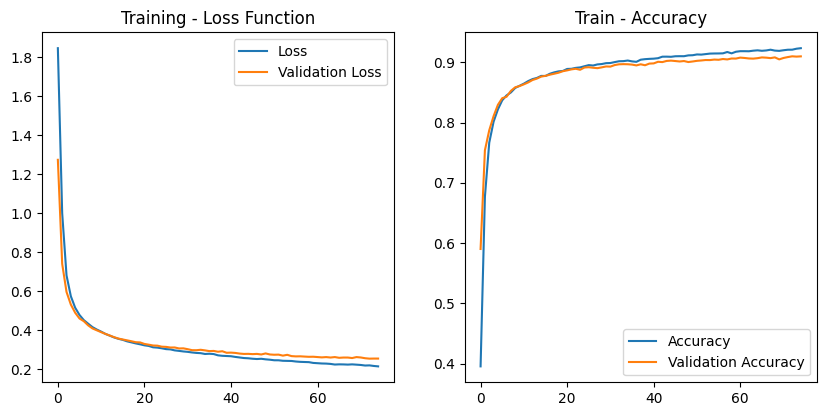

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2728
Test Accuracy : 0.9034


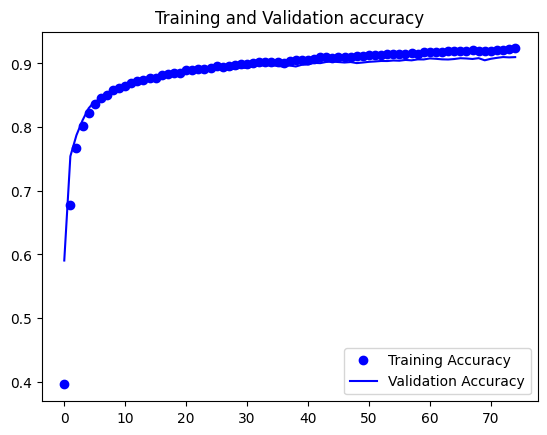

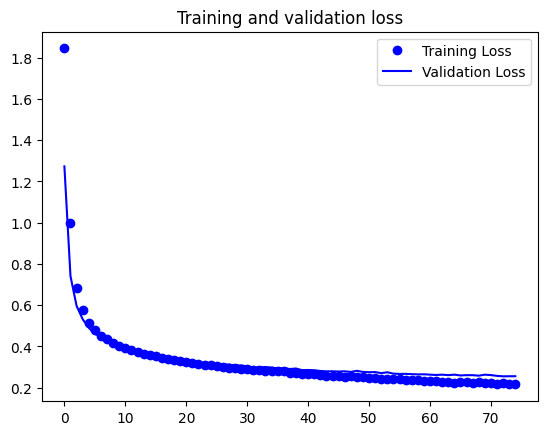

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()